In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/alket/TensorflowImages/labrador-bordercollie/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 104 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
   
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
   
    # 512 neuron hidden layer
   
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Reps') and 1 for the other ('Dems')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])



In [6]:
history = model.fit(train_generator, epochs=20, verbose = 1)

Epoch 1/20
2/2 [==============================] - 7s 4s/step - loss: 2.7540 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 0.7066 - accuracy: 0.4038
Epoch 3/20
2/2 [==============================] - 6s 2s/step - loss: 0.6709 - accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 6s 3s/step - loss: 1.4162 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 6s 2s/step - loss: 0.6769 - accuracy: 0.6346
Epoch 6/20
2/2 [==============================] - 6s 2s/step - loss: 0.6569 - accuracy: 0.6635
Epoch 7/20
2/2 [==============================] - 6s 2s/step - loss: 0.6317 - accuracy: 0.7212
Epoch 8/20
2/2 [==============================] - 6s 3s/step - loss: 0.6188 - accuracy: 0.6058
Epoch 9/20
2/2 [==============================] - 6s 4s/step - loss: 0.5884 - accuracy: 0.7115
Epoch 10/20
2/2 [==============================] - 4s 2s/step - loss: 0.4945 - accuracy: 0.7981
Epoch 11/20
2/2 [==============================] 

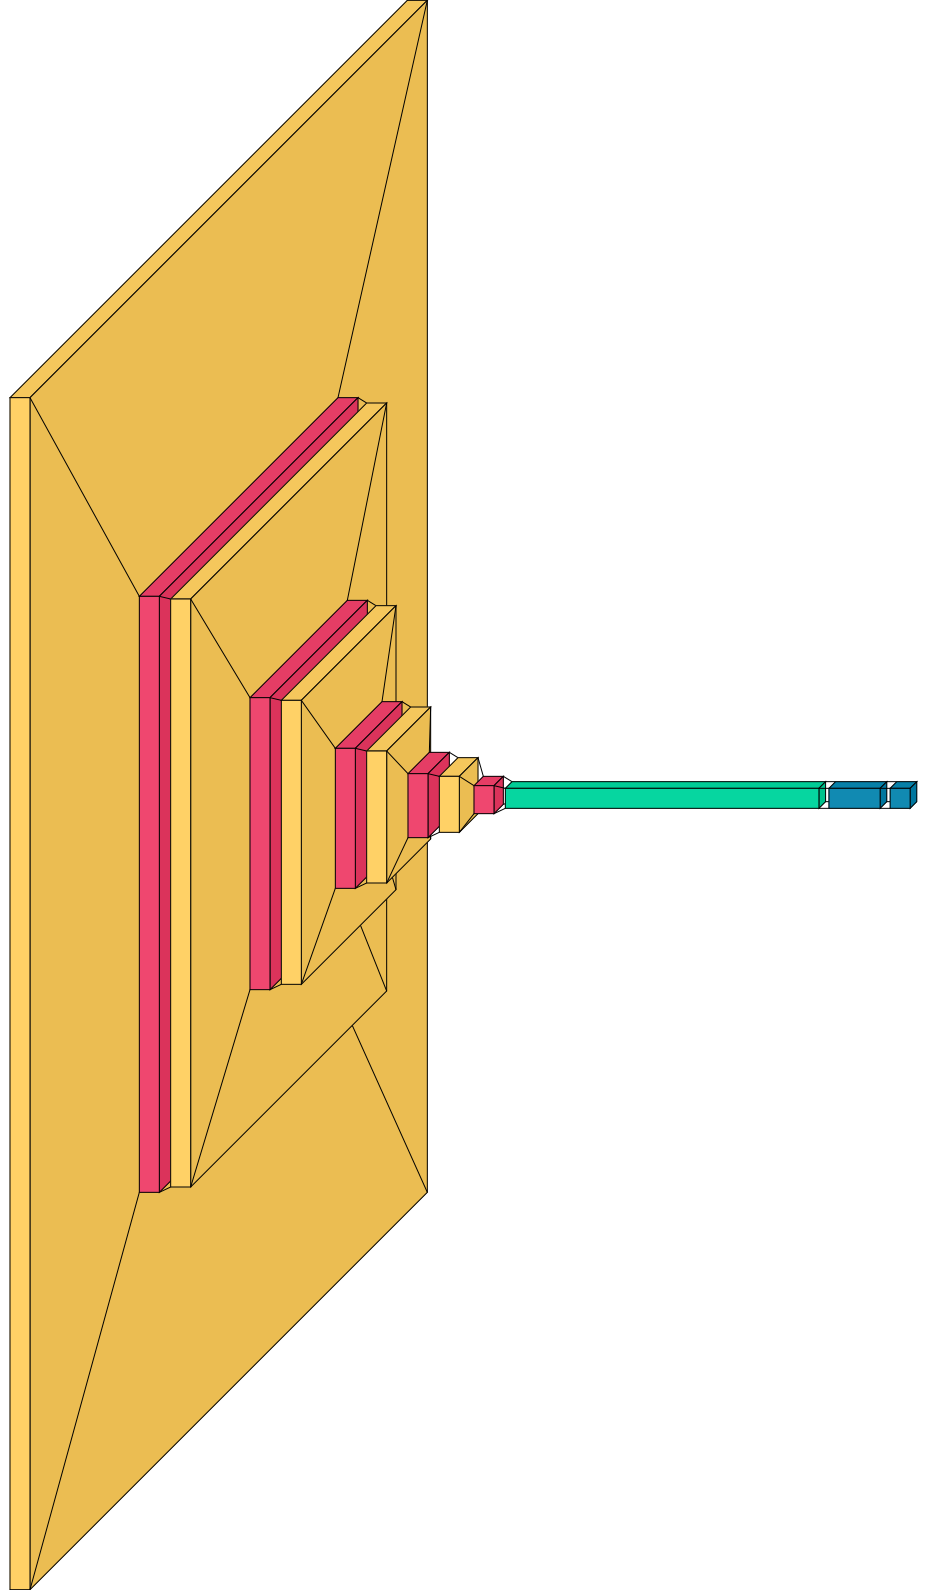

In [7]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
### possibili problemi dovuti alla libreria pil 

In [1]:
#import PIL
#print(PIL.__version__)

8.2.0


In [2]:
#!pip install pillow==8.2.0